In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Methode pour la generation de la matrice H_n

def genere_matrice_H(n):
    return np.array([[1/(1+i+j) for i in range(1,n+1)] for j in range(1,n+1)])+np.eye(n)

In [3]:
def methode_puissance_itere(A,max_iter):
    n=len(A)
    y_0=np.random.random(n)
    x_0=y_0/np.linalg.norm(y_0)
    x=x_0.copy()
    for k in range(max_iter):
        y_new=A@x
        x=y_new/np.linalg.norm(y_new)
    v=x.T@A@x
    return x,v
    

In [4]:
s=genere_matrice_H(5)
methode_puissance_itere(s,1000)

(array([0.61263513, 0.48910527, 0.40848626, 0.3513159 , 0.30849693]),
 1.833789794095377)

In [5]:
def tester_avec_les_n(methode="puiss_itere"):
    n_=[2,5,10,20,50,60]
    valeur_propre=[]
    vecteur_propre=[]
    algo=""
    if methode=="puiss_itere":
        algo=methode_puissance_itere
    for i in n_:
        vect,val=algo(genere_matrice_H(i),1000)
        vecteur_propre.append(vect)
        valeur_propre.append(val)
    return vecteur_propre,valeur_propre

In [6]:
def methode_diflation():
    liste_vect=[]
    list_val=[]
    n_=[2,5,10,20,50,60]
    for i in n_:
        A=genere_matrice_H(i)
        val_court=[]
        vect_court=[]
        for j in range(0,i):
            vect,val= methode_puissance_itere(A,15)
            val_court.append(val)
            vect_court.append(vect)
            A=A-(val/np.linalg.norm(vect)**2)*vect@vect.T 
        liste_vect.append(vect_court)
        list_val.append(val_court)
    return liste_vect,list_val

In [8]:
def Methode_QR():
    n_=[2,5,10,20,50,60]
    liste_vect=[]
    list_val=[]
    for i in n_:
        A=genere_matrice_H(i)
        n=len(A)
        V=np.eye(n)
        A_=A
        for k in range(n):
            q,r=decompositionQR(A_)
            A_=r@q
            V=V@q
        list_val.append(np.diag(A_))
        liste_vect.append(V)
    return list_val,liste_vect

In [7]:
def decompositionQR(A):
    n=len(A)
    Q=np.zeros((n,n))
    R=np.zeros((n,n))
    for k in range(0,n-1):
        R[k,k]=np.linalg.norm(A[:,k])
        Q[:,k]=1/R[k,k]*A[:,k]
        R[k,k+1:]=Q[:,k].T@A[:,k+1:]
        A[:,k+1:]=A[:,k+1:]-np.outer(Q[:,k],R[k,k+1:])
    R[n-1,n-1]=np.linalg.norm(A[:,n-1])
    Q[:,n-1]=1/R[n-1,n-1]*A[:,n-1]
    return Q,R

In [14]:
val_p=methode_diflation()[1]
val_p

[[1.5254025869987393, -1.5358793773304873],
 [1.83378979220094,
  -7.38530079313273,
  29.54646865712393,
  -118.18737088512174,
  472.7498446611385],
 [2.0758072456600454,
  -18.79055643247493,
  169.12011899254668,
  -1522.0816744608255,
  13698.735136737996,
  -123288.61623804664,
  1109597.5461432424,
  -9986377.915289272,
  89877401.23760346,
  -808896611.1384311],
 [2.3035454044282204,
  -43.9584824856078,
  835.2153267069608,
  -15869.091433034057,
  301512.7372395019,
  -5728742.007551162,
  108846098.14347209,
  -2068075864.7259698,
  39293441429.793434,
  -746575387166.0754,
  14184932356155.434,
  -269513714766953.2,
  5120760580572110.0,
  -9.729445103087014e+16,
  1.8485945695865324e+18,
  -3.5123296822144123e+19,
  6.673426396207386e+20,
  -1.2679510152794037e+22,
  2.4091069290308667e+23,
  -4.5773031651586454e+24],
 [2.5683498544407817,
  -126.17665264608885,
  6182.658507512071,
  -302950.2669203272,
  14844563.079097101,
  -727383590.875758,
  35641795952.91214,
  -17

In [42]:
n=[2,5,10,20,50,60]
"""pour chaque n on je calcule la difference entre les valeur propre retourne par ma fonction 
  et celles retournees par la fonction de numpy
"""
erre_with_puis=[np.sqrt(sum((np.linalg.eigh(genere_matrice_H(n[i]))[0]-np.array(val_p[i]))**2)) for i in range(len(n))]
erre_with_puis

[3.104710404268806,
 486.68641951287094,
 813936516.1264087,
 4.5836561219497463e+24,
 1.7001274519190388e+83,
 7.92372616653504e+104]

# Vu les erreurs il me semble que y'a un souci avec ma methode des puissance itere mais je ne trouve  pas se trouve l'erreur exactement 

In [32]:
val_QR=Methode_QR()[0]
val_QR

[array([1.47306681, 1.06026653]),
 array([1.82949678, 1.01363685, 1.01359814, 1.01174426, 1.00973465]),
 array([2.07580194, 1.03125259, 1.02488191, 1.01576618, 1.01028679,
        1.00717154, 1.00532102, 1.00415738, 1.00338569, 1.00284955]),
 array([2.3035454 , 1.17076772, 1.00596458, 1.0025164 , 1.00195462,
        1.00182262, 1.00176222, 1.00169989, 1.00162392, 1.00153738,
        1.00144574, 1.0013536 , 1.00126419, 1.00117943, 1.00110037,
        1.00102741, 1.00096055, 1.00089957, 1.00084411, 1.00079374]),
 array([2.56834985, 1.32027144, 1.00809208, 1.01227018, 1.0097188 ,
        1.00629783, 1.00400868, 1.00266138, 1.00186918, 1.00138727,
        1.00108161, 1.00087955, 1.0007407 , 1.00064178, 1.00056891,
        1.00051352, 1.00047017, 1.00043533, 1.00040662, 1.00038243,
        1.00036165, 1.00034349, 1.00032737, 1.0003129 , 1.00029976,
        1.00028772, 1.00027662, 1.00026632, 1.00025671, 1.00024771,
        1.00023926, 1.00023129, 1.00022377, 1.00021666, 1.00020991,
        

In [43]:
"""pour chaque n on je calcule la difference entre les valeur propre retourne par ma fonction 
  et celles retournees par la fonction de numpy
"""
erreQR=[np.sqrt(sum((np.linalg.eigh(genere_matrice_H(n[i]))[0]-np.array(val_QR[i]))**2)) for i in range(len(n))]
erreQR

[0.6578021849174059,
 1.1698081527452957,
 1.5230444589232368,
 1.859600470732643,
 2.2642985206074524,
 2.339319897691517]

# Il me semble correct ce resultat

C:\Users\Souniz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

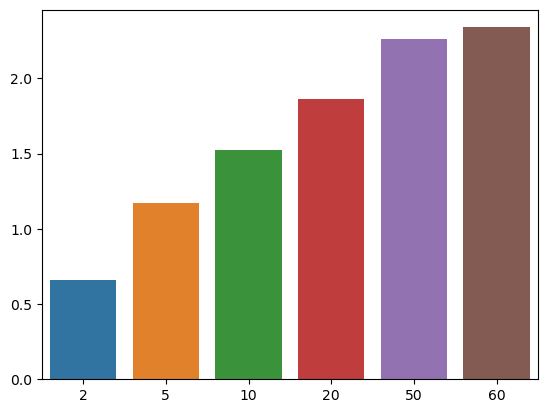

In [39]:
sns.barplot(x=[i for i in n],y=erreQR)

# Plus la taille de la matrice est grande plus l'erreur est grande aussi 